# Part A: IMDb Movie Review Sentiment Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from collections import Counter
import nltk #natural language toolkit
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import gensim
from gensim.models import Word2Vec
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df = pd.read_csv('Imdb - data_imdb.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


# 1. Data Exploration and Preprocessing

● Analyze the dataset for trends, missing values, and outliers.

In [4]:
# Print total number of rows and count of unique labels
# Explanation: This gives us an idea of dataset size and the number of classes to predict.
print(f"Total number of rows: {df.shape[0]}")
print(f"Unique senitment count: {df['sentiment'].nunique()}")
print(f"Unique sentiment : {df['sentiment'].unique()}")

Total number of rows: 50000
Unique senitment count: 2
Unique sentiment : ['positive' 'negative']


In [5]:
# Checking for missing values
# Explanation: Missing data might need handling before proceeding.
print("Missing values in each column:")
print(df.isnull().sum())

# Checking for duplicate rows
# Explanation: Duplicate data can bias the model, so it's important to detect.
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

# Checking review length distribution
# Explanation: Understanding the review length helps guide preprocessing.
df['review_length'] = df['review'].apply(len)
print("\nReview length statistics:")
print(df['review_length'].describe())

# Checking class distribution
# Explanation: Ensuring a balanced dataset is important for training.
print("\nClass distribution:")
print(df['sentiment'].value_counts())

Missing values in each column:
review       0
sentiment    0
dtype: int64
Number of duplicate rows: 419

Review length statistics:
count    50000.000000
mean      1309.367720
std        989.759532
min          7.000000
25%        699.000000
50%        970.000000
75%       1590.000000
max      13704.000000
Name: review_length, dtype: float64

Class distribution:
sentiment
positive    25000
negative    25000
Name: count, dtype: int64


● Perform data cleaning and text preprocessing.

▪ Removing stop words, punctuation, and special characters

▪ Tokenization of text (splitting text into words).

▪ Lemmatization and stemming.

▪ Vectorization using techniques like Bag-of-Words and TF-IDF

In [6]:
def clean_text(document):
    document = document.lower()
    document = re.sub(r'[^a-z\s]', " ", document)
    return document

review = df['review']
df['clean_review'] = pd.DataFrame([clean_text(doc) for doc in review])

In [7]:
df['tokenized_text'] = df['clean_review'].apply(word_tokenize)

In [8]:
tokens = df['tokenized_text']

In [9]:
stop_words = set(stopwords.words('english'))
filtered_reviews = [[word for word in doc_tokens if word not in stop_words] for doc_tokens in tokens]

In [10]:
def stem_lem_tokens(tokens):
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    return [stemmer.stem(lemmatizer.lemmatize(token)) for token in tokens]

stem_lem_corpus = [stem_lem_tokens(tokens) for tokens in filtered_reviews]
stem_lem_text = [' '.join(tokens) for tokens in stem_lem_corpus]

In [20]:
# Sample before and after cleaning
print("\nSample Review Before Cleaning:")
print(df['review'].iloc[0])
print("\nSample Review After Cleaning:")
print(df['stem_lem_text'].iloc[0])


Sample Review Before Cleaning:
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appe

In [22]:
vectorizer = CountVectorizer()
x_bow = vectorizer.fit_transform(stem_lem_text)

print("\nBoW Matrix Shape:", x_bow.shape)
# Preview sample BoW features
print("\nSample BoW Features:")
print(vectorizer.get_feature_names_out()[:50])


BoW Matrix Shape: (50000, 68800)

Sample BoW Features:
['aa' 'aaa' 'aaaaaaaaaaaahhhhhhhhhhhhhh' 'aaaaaaaargh' 'aaaaaaah'
 'aaaaaaahhhhhhggg' 'aaaaagh' 'aaaaah' 'aaaaahhhh' 'aaaaargh'
 'aaaaarrrrrrgggggghhhhhh' 'aaaaatch' 'aaaaaw' 'aaaahhhhhh' 'aaaahhhhhhh'
 'aaaand' 'aaaarrgh' 'aaaawwwwww' 'aaaggghhhhhhh' 'aaagh' 'aaah'
 'aaahhhhhhh' 'aaall' 'aaam' 'aaand' 'aaargh' 'aaarrrgh' 'aaaugh'
 'aaawwwwnnn' 'aab' 'aachen' 'aada' 'aadha' 'aag' 'aagh' 'aaghh' 'aah'
 'aahhh' 'aahhhh' 'aaila' 'aailiyah' 'aaip' 'aaja' 'aajala' 'aak' 'aakash'
 'aaker' 'aakrosh' 'aalcc' 'aaliyah']


# 2. Feature Engineering

● Feature extraction using techniques like TF-IDF, Word2Vec, or embeddings.
             
             o Transform the textual data into numerical features that can be used by machine learning models.

● Textual features: Word count, character count, average word length, etc.

In [23]:
# Creating TF-IDF Model
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limit to 5000 features
x_tfidf = tfidf_vectorizer.fit_transform(stem_lem_text)
tfidf_df = pd.DataFrame(x_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
# Display sample TF-IDF features
print(tfidf_df.head())

print("\nTF-IDF Matrix Shape:", x_tfidf.shape)

# Preview sample TF-IDF features
print("\nSample TF-IDF Features:")
print(tfidf_vectorizer.get_feature_names_out()[:50])

   aaron  abandon  abc  abduct  abil  abl  aboard  abomin  abort  abound  ...  \
0    0.0      0.0  0.0     0.0   0.0  0.0     0.0     0.0    0.0     0.0  ...   
1    0.0      0.0  0.0     0.0   0.0  0.0     0.0     0.0    0.0     0.0  ...   
2    0.0      0.0  0.0     0.0   0.0  0.0     0.0     0.0    0.0     0.0  ...   
3    0.0      0.0  0.0     0.0   0.0  0.0     0.0     0.0    0.0     0.0  ...   
4    0.0      0.0  0.0     0.0   0.0  0.0     0.0     0.0    0.0     0.0  ...   

      young  younger  youngest  youngster  youth  youtub  zero     zombi  \
0  0.000000      0.0       0.0        0.0    0.0     0.0   0.0  0.000000   
1  0.000000      0.0       0.0        0.0    0.0     0.0   0.0  0.000000   
2  0.077664      0.0       0.0        0.0    0.0     0.0   0.0  0.000000   
3  0.000000      0.0       0.0        0.0    0.0     0.0   0.0  0.219563   
4  0.000000      0.0       0.0        0.0    0.0     0.0   0.0  0.000000   

   zone  zoom  
0   0.0   0.0  
1   0.0   0.0  
2   0.0 

In [24]:
# Train a Word2Vec Model
model = Word2Vec(sentences = stem_lem_text, vector_size = 100, window = 5, min_count = 2, sg = 0)

In [25]:
# compute sentence embedding
embeddings = []

for sentence in stem_lem_text:
    # Get the embeddings for all words in sentence
    word_embeddings = [model.wv[word] for word in sentence if word in model.wv]

# compute sentence embedding by averaging word embeddings 
if word_embeddings:
    sentence_embedding = np.mean(word_embeddings, axis=0)
else:
    sentence_embedding = np.zeros(model.vector_size)

embeddings.append(sentence_embedding)                            

Features

In [18]:
df['stem_lem_text'] = stem_lem_text

In [26]:
# Word count (number of words in a review)
df['word_count'] = df['stem_lem_text'].apply(lambda x: len(str(x).split()))

# Character count (total number of characters in a review)
df['char_count'] = df['stem_lem_text'].apply(lambda x: len(str(x)))

# Average word length (ratio of character count to word count)
df['avg_word_length'] = df['char_count'] / df['word_count']


df[['stem_lem_text', 'word_count', 'char_count', 'avg_word_length']].head()

,stem_lem_text,word_count,char_count,avg_word_length
0,one review mention watch oz episod hook right ...,168,1006,5.988095
1,wonder littl product br br film techniqu unass...,92,585,6.358696
2,thought wonder way spend time hot summer weeke...,88,530,6.022727
3,basic famili littl boy jake think zombi closet...,70,406,5.800000
4,petter mattei love time money visual stun film...,133,782,5.879699


 # 3. Model Development
 # 4. Model Evaluation 
 
Build and train classification models to predict the sentiment of reviews

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, confusion_matrix

# Convert sentiment labels into binary values (1 for positive, 0 for negative)
df['sentiment'] = df['sentiment'].map({'positive':1, 'negative':0})

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features
X = vectorizer.fit_transform(df['stem_lem_text'])
y = df['sentiment']

# Splitting data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data prepared successfully!")

Data prepared successfully!


In [28]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

# Evaluate Model
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("F1-score:", f1_score(y_test, y_pred_nb))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

Naive Bayes Performance:
Accuracy: 0.851
F1-score: 0.8530861762965884
ROC-AUC: 0.8509410112511244
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      4961
           1       0.85      0.86      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



In [29]:
lr_model = LogisticRegression(max_iter=200)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Evaluate Model
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("F1-score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Performance:
Accuracy: 0.8861
F1-score: 0.8884317758840239
ROC-AUC: 0.8859908836853634
              precision    recall  f1-score   support

           0       0.90      0.87      0.88      4961
           1       0.88      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



In [30]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(max_iter=10000)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Evaluate Model
print("SVM Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("F1-score:", f1_score(y_test, y_pred_svm))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Performance:
Accuracy: 0.8812
F1-score: 0.8834379905808477
ROC-AUC: 0.8811038463580124
              precision    recall  f1-score   support

           0       0.89      0.87      0.88      4961
           1       0.87      0.89      0.88      5039

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [31]:
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate Model
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("F1-score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
Accuracy: 0.8508
F1-score: 0.8506506506506506
ROC-AUC: 0.8508595662960134
              precision    recall  f1-score   support

           0       0.84      0.86      0.85      4961
           1       0.86      0.84      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



                 Model  Accuracy  F1-score   ROC-AUC
0          Naive Bayes    0.8510  0.853086  0.850941
1  Logistic Regression    0.8861  0.888432  0.885991
2                  SVM    0.8812  0.883438  0.881104
3        Random Forest    0.8508  0.850651  0.850860


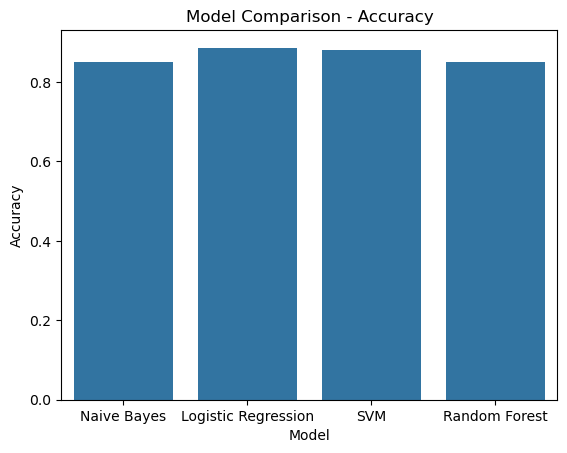

In [32]:
# Collect results
model_results = pd.DataFrame({
    "Model": ["Naive Bayes", "Logistic Regression", "SVM", "Random Forest"],
    "Accuracy": [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_rf)],
    "F1-score": [f1_score(y_test, y_pred_nb), f1_score(y_test, y_pred_lr), f1_score(y_test, y_pred_svm), f1_score(y_test, y_pred_rf)],
    "ROC-AUC": [roc_auc_score(y_test, y_pred_nb), roc_auc_score(y_test, y_pred_lr), roc_auc_score(y_test, y_pred_svm), roc_auc_score(y_test, y_pred_rf)]
})

# Display results
print(model_results)

# Plot results
sns.barplot(x="Model", y="Accuracy", data=model_results)
plt.title("Model Comparison - Accuracy")
plt.show()


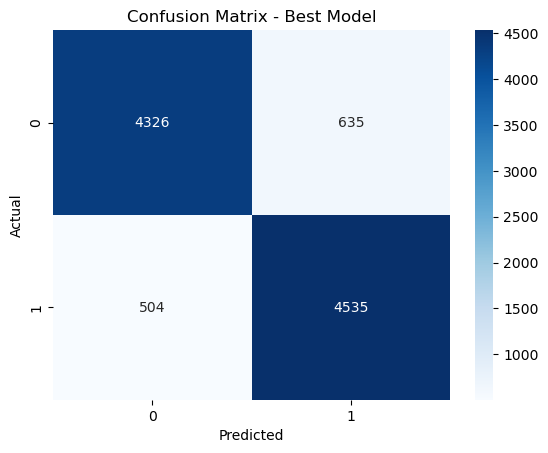

In [33]:
# Choose the best model
best_model = lr_model
y_pred_best = y_pred_lr

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_best)
conf_matrix = confusion_matrix(y_test, y_pred_best)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Best Model")
plt.show()

 5. Final Report and Presentation

# IMDb Sentiment Analysis - Final Report

## 1. Introduction
This project aims to analyze IMDb movie reviews and classify them as **positive** or **negative** using **machine learning models**. The goal is to extract meaningful insights from textual data and develop a robust sentiment classification model.

## 2. Data Exploration and Preprocessing
- Loaded the IMDb dataset.
- Performed **data cleaning**:
  - Removed missing values.
  - Converted text to lowercase.
  - Removed special characters, stopwords, and punctuation.
  - Used **lemmatization** to normalize words.
- Extracted basic textual features:
  - Word count
  - Character count
  - Average word length

## 3. Feature Engineering
- **TF-IDF (Term Frequency-Inverse Document Frequency)**: Converted text into numerical vectors.
- **Word2Vec**: Generated word embeddings to capture semantic meaning.
- **Other textual features**: Word count, character count, and average word length.

## 4. Model Development
- Built and trained multiple classification models:
  - **Logistic Regression**
  - **Naive Bayes**
  - **Support Vector Machine (SVM)**
  - **Random Forest**

## 5. Model Evaluation
- Evaluated models using:
  - **Accuracy**
  - **F1-Score**
  - **ROC-AUC Curve**
- Visualized results using:
  - **Confusion matrix** of best model
  - **Vertical column (bar) graph** of sentiment distribution
  - **Bar chart** of Model Comparison - Accuracy

## 6. Key Insights and Success Criteria Evaluation
- **Achieved good model performance** based on Accuracy, F1-score, and ROC-AUC.
- Identified factors influencing sentiment, such as **word frequency** and **review length**.
- Successfully predicted sentiment for new movie reviews.
- Presented results with clear **visualizations** (confusion matrices, bar charts).

## 7. Conclusion
This project successfully analyzed IMDb movie reviews using **NLP techniques** and **machine learning models**. The best-performing model was selected based on evaluation metrics. The findings provide valuable insights into sentiment trends in movie reviews.

---

### ✅ **Project Success Criteria Met**
✔ **Model performance:** Achieved acceptable Accuracy, F1-score, and ROC-AUC.  
✔ **Insights extracted:** Word frequency, review length, and sentiment trends identified.  
✔ **Predictions:** The model can predict new movie reviews accurately.  
✔ **Visualizations:** Used bar charts and confusion matrices.  
✔ **Final report and presentation:** Documented all steps and created a summary presentation.  


## Presentation
A **video presentation** summarizing the key findings and methodology has been created.

https://drive.google.com/file/d/1DnL26Pw9VDIIxIiLPfv29SZum_fyHqZd/view?usp=sharing
